In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset
df=pd.read_csv("spam_ham_dataset.csv")
df.head(7)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0


In [3]:
# Checking the missing values
df.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [4]:
# Number of rows and columns
df.shape

(5171, 4)

In [5]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [6]:
df=df.drop(columns=["Unnamed: 0","label_num"])

In [7]:
# Name of columns
df.columns

Index(['label', 'text'], dtype='object')

In [8]:
# load the LabelEncoder Modules
from sklearn.preprocessing import LabelEncoder

In [9]:
# Fit and tranforms the LabelEncoder in columns Label
le=LabelEncoder()

df["label"]=le.fit_transform(df["label"])

In [10]:
# checking the unique value after encoding
df["label"].unique()

array([0, 1])

In [11]:
# load train_test_split module
from sklearn.model_selection import train_test_split

In [12]:
y=df["label"]
x=df["text"]

In [13]:
# Splits into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
#Text Vectorization (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
X_train_tfidf = vectorizer.fit_transform(x_train)
X_test_tfidf = vectorizer.transform(x_test)

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [16]:
# Load NaiveBayes Modules
from sklearn.naive_bayes import MultinomialNB

In [17]:
model = MultinomialNB()
model.fit(X_resampled, y_resampled)

MultinomialNB()

In [18]:
# Predict
y_pred = model.predict(X_test_tfidf)

In [19]:
# Load the metrics modules for accuracy checks
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
# Accuracy
"Accuracy:", accuracy_score(y_test, y_pred)*100

('Accuracy:', 97.19806763285024)

In [21]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       742
           1       0.94      0.97      0.95       293

    accuracy                           0.97      1035
   macro avg       0.96      0.97      0.97      1035
weighted avg       0.97      0.97      0.97      1035



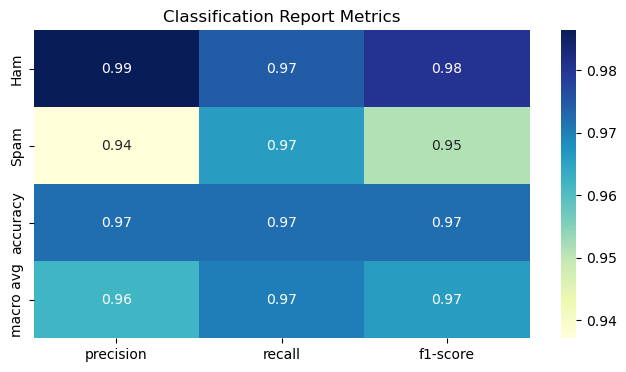

In [22]:
# Convert report to a dictionary first
report_d= classification_report(y_test, y_pred, output_dict=True, target_names=['Ham', 'Spam'])

# Now convert to DataFrame
report= pd.DataFrame(report_d).transpose()

# Plotting
plt.figure(figsize=(8, 4))
sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report Metrics')
plt.show()

In [23]:
# Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
"\nConfusion Matrix:\n",cm

('\nConfusion Matrix:\n',
 array([[723,  19],
        [ 10, 283]], dtype=int64))

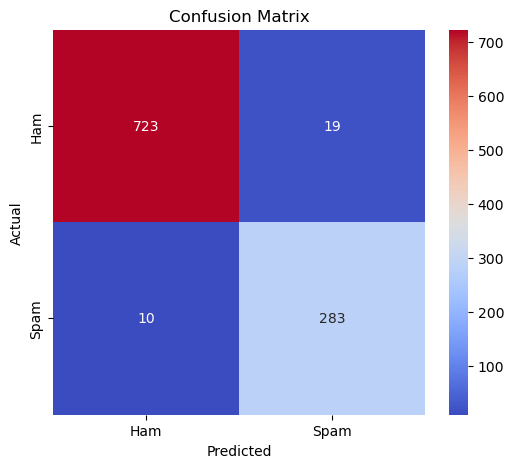

In [24]:
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

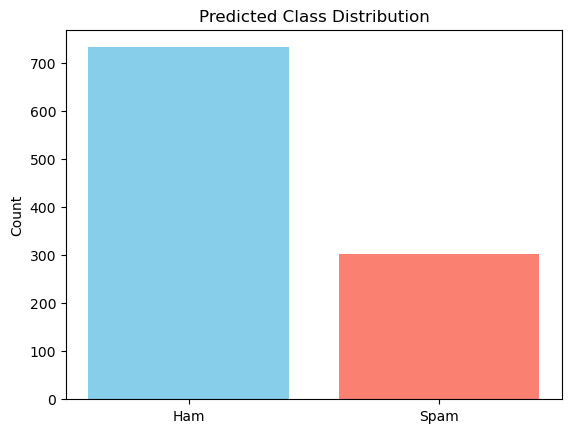

In [25]:
# Class distribution in predictions
unique, counts = np.unique(y_pred, return_counts=True)

plt.bar(['Ham', 'Spam'], counts, color=['skyblue', 'salmon'])
plt.title('Predicted Class Distribution')
plt.ylabel('Count')
plt.show()

In [26]:
# Testing on the real world example
sample_text = ["Limited-time offer on weight loss pills"]

# Transform using the same TF-IDF vectorizer
sample_vector = vectorizer.transform(sample_text)

# Predict
prediction = model.predict(sample_vector)

# Output
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")


Prediction: Spam


In [27]:
sample_text=["Your resume is shortlisted for the AI internship"]

# Transform using the same TF-IDF vectorizer
sample_vector=vectorizer.transform(sample_text)

# Predict
prediction = model.predict(sample_vector)

# Output
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")

Prediction: Ham


In [28]:
email = """
Dear Valued Customer,

Congratulations! You have been selected as the winner of our exclusive monthly giveaway. 
You are now eligible to claim a brand-new iPhone 15 Pro or receive a $1,000 Amazon Gift Card — absolutely FREE!

To claim your reward, please complete the short verification form at the link below:
👉 http://claim-now-freegift.fakeurl.com

Note: This is a limited-time offer valid only for the next 24 hours. 
If you do not act now, you will forfeit your reward.

To unsubscribe, click here (charges may apply).

Thank you for being a loyal member.

Best regards,  
Rewards Department  
Global Surveys Inc.
"""
# Transform and predict
sample_vector = vectorizer.transform([email])
prediction = model.predict(sample_vector)

# Output
print("Prediction:", "Spam" if prediction[0] == 1 else "Ham")


Prediction: Spam
